In [85]:
dianna.head()

,index,date,nth day in year,Storage (mcft),Inflow (cusecs),Rainfall (mm),Outflow (cusecs)
0,0,2018-01-01,0,1842.0,0.0,0.0,57.0
1,1,2018-02-01,1,1837.0,0.0,0.0,56.0
2,2,2018-03-01,2,1832.0,0.0,0.0,56.0
3,3,2018-04-01,3,1827.0,0.0,0.0,56.0
4,4,2018-05-01,4,1822.0,0.0,0.0,55.0


In [82]:
import pandas as pd
import numpy as np
dianna=pd.read_csv('D:\Semester 4\Soft Computing\Chennai Water Supply Manager\\TCHdianna.csv',parse_dates={'date' : ['Date']},na_values=-1)
dianna.info()
dianna.dropna(inplace=True)
dianna=dianna.reset_index()
dianna.head()

raw=dianna.drop(columns=['index','date','nth day in year'])
rawd=dianna.drop(columns=['index','date','nth day in year','Outflow (cusecs)'])
rawd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              730 non-null    datetime64[ns]
 1   nth day in year   730 non-null    int64         
 2   Storage (mcft)    728 non-null    float64       
 3   Inflow (cusecs)   728 non-null    float64       
 4   Rainfall (mm)     728 non-null    float64       
 5   Outflow (cusecs)  728 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 34.3 KB


,Storage (mcft),Inflow (cusecs),Rainfall (mm)
0,1842.0,0.0,0.0
1,1837.0,0.0,0.0
2,1832.0,0.0,0.0
3,1827.0,0.0,0.0
4,1822.0,0.0,0.0


In [83]:
a

[1236.0752,
 1229.1632,
 1222.2512,
 1215.3392,
 1208.4271999999999,
 1200.6511999999998,
 1191.5792,
 1182.5072,
 1174.7312,
 1166.9551999999999,
 1159.1791999999998,
 1151.4031999999997,
 1143.6271999999997,
 1135.8511999999996,
 1128.0751999999995,
 1119.4351999999994,
 1108.6351999999995,
 1096.9711999999995,
 1085.3071999999995,
 1073.6431999999995,
 1061.9791999999995,
 1049.4511999999995,
 1036.9231999999995,
 1025.2591999999995,
 1012.7311999999995,
 1001.9311999999995,
 989.8351999999995,
 976.8751999999995,
 978.6031999999996,
 988.6255999999996,
 1001.5855999999997,
 1014.5455999999997,
 1027.5055999999997,
 1038.7375999999997,
 1049.9695999999997,
 1061.2015999999996,
 1072.4335999999996,
 1083.6655999999996,
 1094.8975999999996,
 1107.8575999999996,
 1120.8175999999996,
 1133.7775999999997,
 1146.7375999999997,
 1159.6975999999997,
 1189.5919999999996,
 1219.5727999999997,
 1269.5119999999997,
 1299.4927999999998,
 1331.4607999999998,
 1349.4319999999998,
 1362.39199999999

<Figure size 432x288 with 0 Axes>

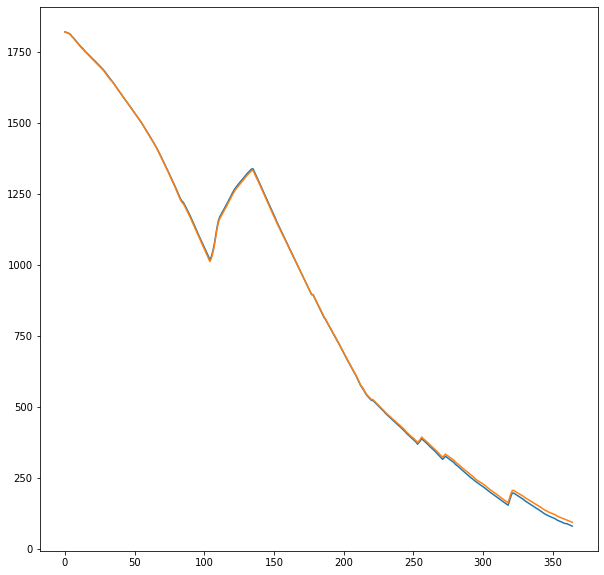

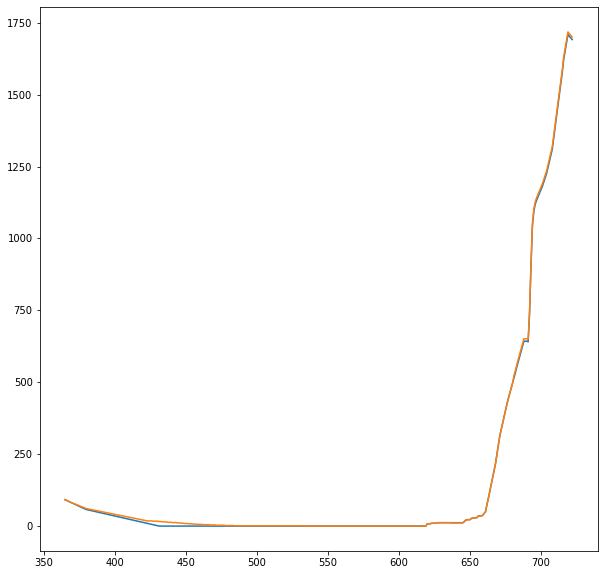

KeyError: 730

In [84]:
import gym
import matplotlib.pyplot as plt
from gym import spaces
from gym.utils import seeding
import numpy as np
from os import path
lookback=5
i=0
class Chembarambaakam(gym.Env):
        metadata = {
            'render.modes': ['human']
        }


        def step(self, a):
            self.action=a
            outflow_factor=0.0864
            inflow_factor=0.0864
            EVAPORATION=0#np.random.random()*1.5#-raw.iloc[self.count+lookback,2]
            if(self.count%365<175 and self.count%365>20):
                EVAPORATION=0#np.random.random()*1+1
            #if(raw.iloc[self.count+lookback,2]==0):
                #EVAPORATION=np.random.random(1)*2+2

            res=self.state[4][0]-EVAPORATION+(raw.iloc[lookback+self.count,1]*inflow_factor)-(self.action*outflow_factor)
            if(res<0):
                res=0
            nextt=np.array(self.state[1:]).tolist()
            nextt.append([res,raw.iloc[lookback+self.count,1],raw.iloc[lookback+self.count,2],self.action])
            self.state=np.array(nextt)

            if(self.action<self.DEMAND_THRESHOLD):
                self.bad_day+=1
                self.reward=-1
            elif(res>3000):
                self.bad_day+=1
                self.reward=-1
            else:
                self.good_day+=1
                self.reward=0

            self.count+=1

            return self.state, -self.reward, self.count>=len(raw)-lookback, {}


        def __init__(self, seed=0):
            self.DEMAND_THRESHOLD=120
            self.MAX_CAPACITY=3000
            self.action = 0.
            self.count = seed
            self.good_day = 0
            self.bad_day = 0
            self.reward=0


            lookback=5
            self.next_state=np.zeros((lookback,raw.shape[-1]))

            sequence=np.zeros((lookback,raw.shape[-1]))
            for j in range(0,lookback):
                    sequence[j]=raw.loc[seed+j,:]
            self.state = sequence

            a=[]
            for i in range(lookback):
                a.append([0., 0.,0., 0.])
            self.low=np.array(a, dtype=np.float32)

            a=[]
            for i in range(lookback):
                a.append([4000., 100000.,1000., 100000.])
            self.high=np.array(a, dtype=np.float32)
            self.action_space = spaces.Box(
                low=0,
                high=100000, shape=(1,),
                dtype=np.uint8
            )
            self.observation_space = spaces.Box(
                low=self.low,
                high=self.high,
                dtype=np.float32
            )


        def reset(self,seed=0):
            self.DEMAND_THRESHOLD=120
            self.MAX_CAPACITY=3000
            self.action = 0.
            self.count = seed
            self.good_day = 0
            self.bad_day = 0
            self.reward=0
            self.next_state=np.zeros((lookback,raw.shape[-1]))
            sequence=np.zeros((lookback,raw.shape[-1]))
            for j in range(0,lookback):
                    sequence[j]=raw.loc[seed+j,:]
            self.state = sequence
            return self.state


        def render(self, mode='human'):
            ;

plt.clf()
start=730
import matplotlib.pyplot as plt
for ij in range(0,10):
    
    i=ij*365
    j=i
    a=[]
    env=Chembarambaakam(i)
    state=env.reset(i)
    done=False
    while(not done and i!=j+365):
            #print(i)
            state,reward,done,_=env.step(raw.iloc[lookback+i,3])
            #print(state[4][0],done)
            a.append(state[4][0])
            score+=reward
            i+=1
    plt.figure(figsize=(10,10))
    plt.plot(range(j,i),a)
    plt.plot(range(j,i),raw.iloc[j+lookback:i+lookback,0])
    plt.show()

In [51]:
print(a)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [25]:
raw['predicted']=a

In [26]:
raw.to_csv('preda')